# Project_Notes_003

## Earthquake Damage in Nepal
In this project, a data in the form of parquet with 762106 rows and 31 columns is used to predict earthquake damage in Nepal by cleaning the data of leaky columns, colinearity and high dimensionality. In the end LogisticRegression, DecisionTreeClassifier and XGBClassifier will be used to analyse the date with the training and testing accuracy recorded and the histogram of the feature importances produced in each case.

In [1]:
# Surpress Warnings.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
# Define the path.
path = './data/Project_Notes_003_data.parquet'

In [3]:
# Import the dataframe as df.
df = pd.read_parquet(path)
print(f"Shape of df: {df.shape}")
df.head()

Shape of df: (762106, 31)


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [4]:
# Check the info of df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 

In [5]:
# Check missing values in df.
df.isnull().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

In [6]:
# Drop rows with missing values.
df.dropna(inplace=True)
print(f"Shape of df: {df.shape}")
df.head()

Shape of df: (762094, 31)


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [7]:
# Creat binary target.
df["damage_grade"] = df["damage_grade"].str[-1].astype('int64')
df["severe_damage"] = (df["damage_grade"] > 3).astype('int64')

In [8]:
# Instantiate columns to drop with 'damage_grade'.
drop_cols = ['damage_grade']

In [9]:
# Identify leaky columns and add to drop cols.
leaky_cols = [col for col in df.columns if "post_eq" in col]
leaky_cols

['count_floors_post_eq', 'height_ft_post_eq', 'condition_post_eq']

In [10]:
# Add leaky_cols to drop_cols.
drop_cols = drop_cols + leaky_cols
drop_cols

['damage_grade',
 'count_floors_post_eq',
 'height_ft_post_eq',
 'condition_post_eq']

In [11]:
# Add 'technical_solution_proposed' to drop_cols.
drop_cols.append("technical_solution_proposed")
drop_cols

['damage_grade',
 'count_floors_post_eq',
 'height_ft_post_eq',
 'condition_post_eq',
 'technical_solution_proposed']

In [12]:
# Get the information of df.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762094 entries, 0 to 762105
Data columns (total 32 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762094 non-null  int64 
 1   district_id                             762094 non-null  int64 
 2   vdcmun_id                               762094 non-null  int64 
 3   ward_id                                 762094 non-null  int64 
 4   count_floors_pre_eq                     762094 non-null  int64 
 5   count_floors_post_eq                    762094 non-null  int64 
 6   age_building                            762094 non-null  int64 
 7   plinth_area_sq_ft                       762094 non-null  int64 
 8   height_ft_pre_eq                        762094 non-null  int64 
 9   height_ft_post_eq                       762094 non-null  int64 
 10  land_surface_condition                  762094 non-null 

In [13]:
# Columns to convert from int to categorical dtype.
col_list = ['building_id', 'district_id', 'vdcmun_id', 'ward_id', 'has_superstructure_adobe_mud',
            'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
            'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick',
            'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 
            'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
            'has_superstructure_rc_engineered', 'has_superstructure_other', 'damage_grade']

In [14]:
# Convert columns.
df[col_list] = df[col_list].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762094 entries, 0 to 762105
Data columns (total 32 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             762094 non-null  category
 1   district_id                             762094 non-null  category
 2   vdcmun_id                               762094 non-null  category
 3   ward_id                                 762094 non-null  category
 4   count_floors_pre_eq                     762094 non-null  int64   
 5   count_floors_post_eq                    762094 non-null  int64   
 6   age_building                            762094 non-null  int64   
 7   plinth_area_sq_ft                       762094 non-null  int64   
 8   height_ft_pre_eq                        762094 non-null  int64   
 9   height_ft_post_eq                       762094 non-null  int64   
 10  land_surface_condition          

In [15]:
# Create correlation matrix.
correlation = df.select_dtypes("number").drop(columns="severe_damage").corr()
correlation

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq
count_floors_pre_eq,1.000000,0.263945,0.047125,0.102366,0.711189,0.190654
count_floors_post_eq,0.263945,1.000000,-0.003965,0.138072,0.261782,0.937868
age_building,0.047125,-0.003965,1.000000,-0.008477,0.036432,-0.007123
plinth_area_sq_ft,0.102366,0.138072,-0.008477,1.000000,0.203796,0.195984
height_ft_pre_eq,0.711189,0.261782,0.036432,0.203796,1.000000,0.375300
height_ft_post_eq,0.190654,0.937868,-0.007123,0.195984,0.375300,1.000000


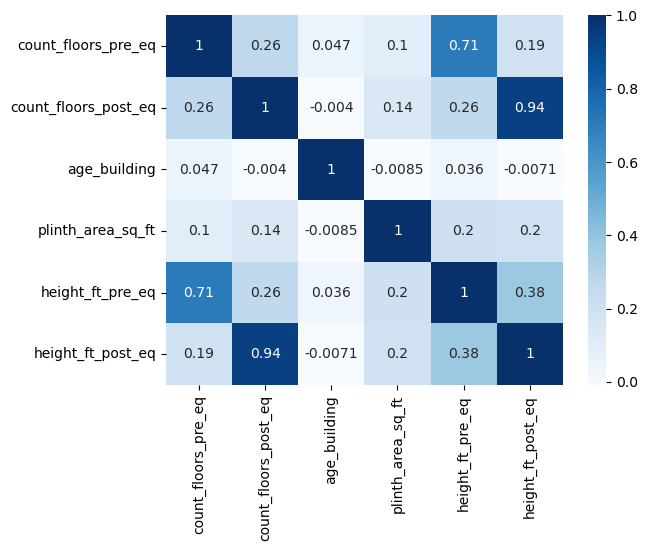

In [16]:
# Plot heatmap of `correlation`.
sns.heatmap(correlation, cmap="Blues", annot=True);

In [17]:
# calulate correlation between 'severe_damage' and 'count_floors_pre_eq'.
df["severe_damage"].corr(df["count_floors_pre_eq"]).round(4)

0.169

In [18]:
# calulate correlation between 'severe_damage' and 'height_ft_pre_eq'.
df["severe_damage"].corr(df["height_ft_pre_eq"]).round(4)

0.0491

In [19]:
# Add multi-colinearity column 'count_floors_pre_eq' to drop_cols.
drop_cols.append("count_floors_pre_eq")
drop_cols

['damage_grade',
 'count_floors_post_eq',
 'height_ft_post_eq',
 'condition_post_eq',
 'technical_solution_proposed',
 'count_floors_pre_eq']

In [20]:
# Extract object columns fron data.
df_obj = df.select_dtypes(include="object")
df_obj.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,technical_solution_proposed
0,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Major repair
1,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Reconstruction
2,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Minor repair
3,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Minor repair
4,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Minor repair


In [21]:
# Check dimensionality of columns in 'df_obj'.
df_obj.nunique()

land_surface_condition          3
foundation_type                 5
roof_type                       3
ground_floor_type               5
other_floor_type                4
position                        4
plan_configuration             10
condition_post_eq               8
technical_solution_proposed     4
dtype: int64

In [22]:
# Extract category columns fron data.
df_cat = df.select_dtypes(include="category")
df_cat.head()

,building_id,district_id,vdcmun_id,ward_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,120101000011,12,1207,120703,0,1,0,0,0,0,0,1,0,0,0,3
1,120101000021,12,1207,120703,0,1,0,0,0,0,0,1,0,0,0,5
2,120101000031,12,1207,120703,0,1,0,0,0,0,0,0,0,0,0,2
3,120101000041,12,1207,120703,0,1,0,0,0,0,0,0,0,0,0,2
4,120101000051,12,1207,120703,0,1,0,0,0,0,0,0,0,0,0,1


In [23]:
# Check dimensionality of columns in 'df_cat'.
df_cat.nunique()

building_id                               762094
district_id                                   11
vdcmun_id                                    110
ward_id                                      945
has_superstructure_adobe_mud                   2
has_superstructure_mud_mortar_stone            2
has_superstructure_stone_flag                  2
has_superstructure_cement_mortar_stone         2
has_superstructure_mud_mortar_brick            2
has_superstructure_cement_mortar_brick         2
has_superstructure_timber                      2
has_superstructure_bamboo                      2
has_superstructure_rc_non_engineered           2
has_superstructure_rc_engineered               2
has_superstructure_other                       2
damage_grade                                   5
dtype: int64

In [24]:
# Extract category columns with dimensionality not between 2 and 99.
cat_dim = [col for col in df_cat.columns if df_cat[col].nunique() not in range(2,99)]
cat_dim

['building_id', 'vdcmun_id', 'ward_id']

In [25]:
# Add high-cordinality columns 'cat_dim' to drop_cols.
drop_cols = drop_cols + cat_dim
drop_cols

['damage_grade',
 'count_floors_post_eq',
 'height_ft_post_eq',
 'condition_post_eq',
 'technical_solution_proposed',
 'count_floors_pre_eq',
 'building_id',
 'vdcmun_id',
 'ward_id']

In [26]:
# Drop required columns.
df.drop(columns=drop_cols, inplace=True)

In [27]:
# Check df.
print(f"Shape of df: {df.shape}")
df.head()

Shape of df: (762094, 23)


,district_id,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,severe_damage
0,12,9,288,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,...,0,0,0,0,0,1,0,0,0,0
1,12,15,364,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,...,0,0,0,0,0,1,0,0,0,1
2,12,20,384,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,...,0,0,0,0,0,0,0,0,0,0
3,12,20,312,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,...,0,0,0,0,0,0,0,0,0,0
4,12,30,308,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Inspect the value distribution of severe_damage.
print(df["severe_damage"].value_counts())

1    459610
0    302484
Name: severe_damage, dtype: int64


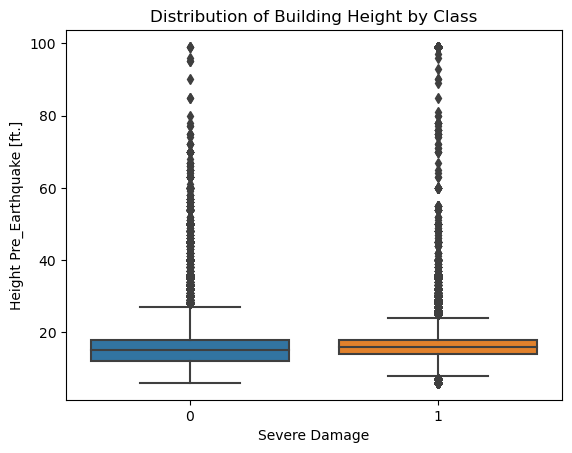

In [29]:
# Create boxplot with 'severe_damage' and 'height_ft_pre_eq'.
sns.boxplot(x="severe_damage", y="height_ft_pre_eq", data=df)
plt.xlabel("Severe Damage")
plt.ylabel("Height Pre_Earthquake [ft.]")
plt.title("Distribution of Building Height by Class");

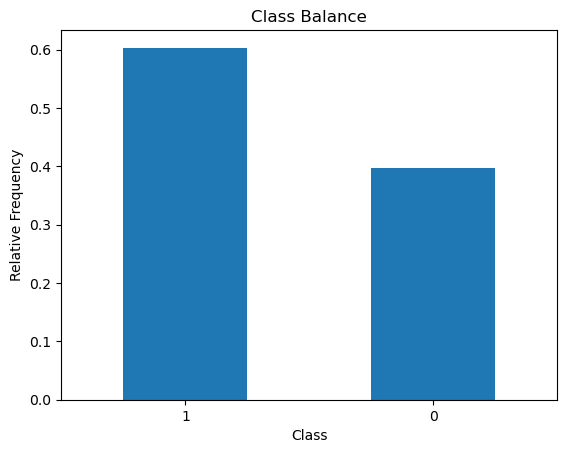

In [30]:
# Plot value counts of 'severe_damage'.
df["severe_damage"].value_counts(normalize=True).plot(kind="bar", xlabel="Class", 
                                                      ylabel="Relative Frequency", title="Class Balance")

plt.xticks(rotation='horizontal');

In [31]:
# Normalized value counts for the two classes in df["severe_damage"] 'majority_class_prop' and 'minority_class_prop'.
majority_class_prop, minority_class_prop = df["severe_damage"].value_counts(normalize=True).round(4)
print(majority_class_prop, minority_class_prop)

0.6031 0.3969


In [32]:
# Create pivot table.
foundation_pivot = pd.pivot_table(df, index="foundation_type", values="severe_damage", 
                                  aggfunc=np.mean).sort_values(by="severe_damage")

foundation_pivot

,severe_damage
foundation_type,
RC,0.038263
Bamboo/Timber,0.237855
Cement-Stone/Brick,0.296904
Other,0.510545
Mud mortar-Stone/Brick,0.685115


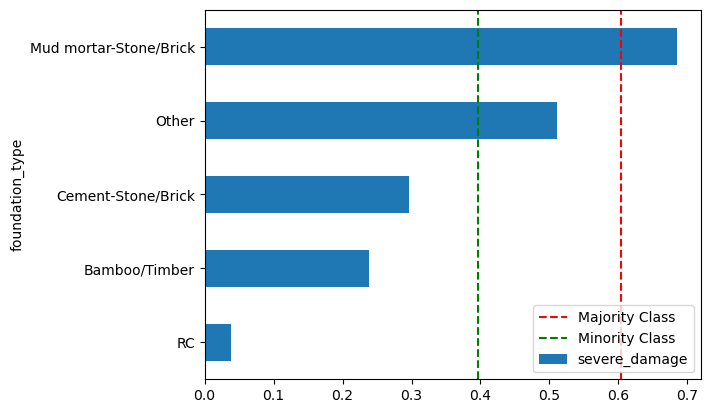

In [33]:
# Plot bar chart of `foundation_pivot`.
foundation_pivot.plot(kind="barh", legend=None)

plt.axvline(majority_class_prop, linestyle="--", color="red", label="Majority Class")

plt.axvline(minority_class_prop, linestyle="--", color="green", label="Minority Class")

plt.legend(loc="lower right");

In [34]:
# Check for high- and low-cardinality categorical features.
df.select_dtypes("object").nunique()

land_surface_condition     3
foundation_type            5
roof_type                  3
ground_floor_type          5
other_floor_type           4
position                   4
plan_configuration        10
dtype: int64

In [35]:
# Create feature matrix X and target vector y "severe_damage".
target = "severe_damage"
X_use = df.drop(columns=target)
y_use = df[target]

In [36]:
# Copy the X_use and y_use data.
X = X_use.copy()
y = y_use.copy()

# Divide data (X and y) into training and test sets using a randomized train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (609675, 22)
y_train shape: (609675,)
X_test shape: (152419, 22)
y_test shape: (152419,)


In [37]:
# Calculate baseline accuracy score.
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.6035


In [38]:
# Create pipeline that contains a OneHotEncoder transformer and a LogisticRegression.
model = make_pipeline(OneHotEncoder(use_cat_names=True), LogisticRegression(max_iter=2000))

# Fit model to training data.
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['district_id', 'land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration',
                                     'has_superstructure_adobe_mud',
                                     'has_superstructure_mud_mortar_stone',
                                     'has_superstructure_stone_flag',
                                     'has_superstructure_cement_mortar_stone',
                                     'has_superstructure_mud_mortar_brick',
                                     'has_superstructure_cement_mortar_brick',
                                     'has_superstructure_timber',
                                     'has_superstructure_bamboo',
                                     'has_superstructure_rc_non_engineered',
                                     'has_superstructure_rc_engineered',
                                     'has_superstructure_other'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=2000))])

In [39]:
# Calculate training and test accuracy scores.
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Train Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Train Accuracy: 0.7584
Test Accuracy: 0.757


In [40]:
# Use predict_proba with your training data.
y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.63689166 0.36310834]
 [0.13036353 0.86963647]
 [0.34241662 0.65758338]
 [0.4984088  0.5015912 ]
 [0.32575317 0.67424683]]


In [41]:
# Extract feature names and importances from model.
features = model.named_steps["onehotencoder"].get_feature_names()
importances = model.named_steps["logisticregression"].coef_[0]

In [42]:
# Create series odds_ratios, where the index is features and values are exponential of the importances.
odds_ratios = pd.Series(np.exp(importances), index=features).sort_values()
odds_ratios.head()

district_id_12.0      0.189279
district_id_31.0      0.225262
foundation_type_RC    0.315150
district_id_20.0      0.422511
district_id_21.0      0.439732
dtype: float64

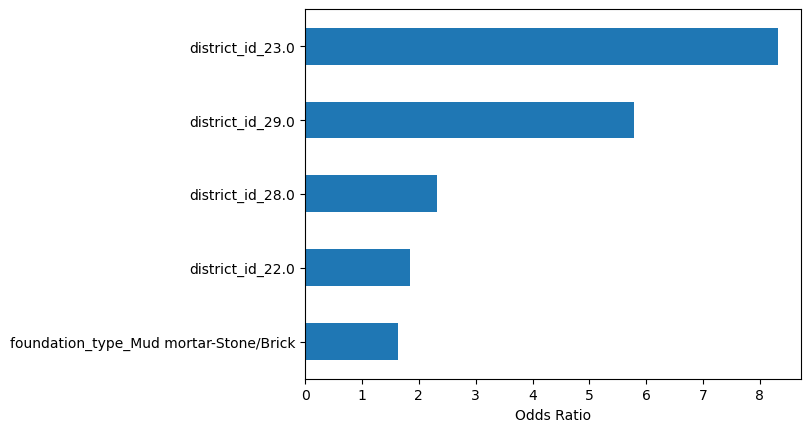

In [43]:
# Horizontal bar chart, five largest coefficients.
odds_ratios.tail().plot(kind="barh")
plt.xlabel("Odds Ratio");

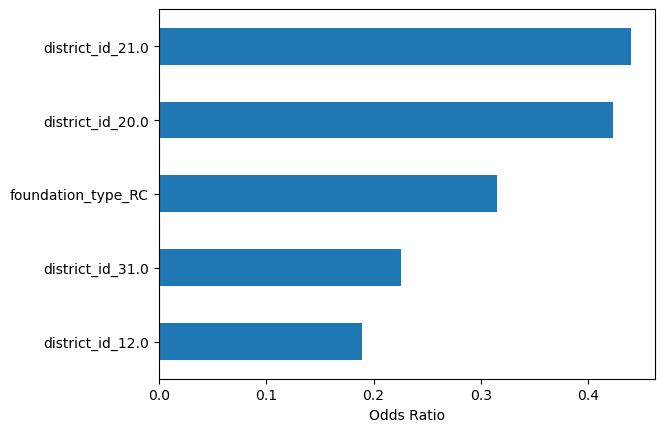

In [44]:
# Horizontal bar chart, five smallest coefficients.
odds_ratios.head().plot(kind="barh")
plt.xlabel("Odds Ratio");

In [45]:
# Copy the X_use and y_use data.
X = X_use.copy()
y = y_use.copy()

# Divide data (X and y) into training and test sets using a randomized train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Create pipeline that contains a OrdinalEncoder transformer and a DecisionTreeClassifier predictor.
model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier())

# Fit model to training data.
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['district_id', 'land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'has_superstructure_adobe_mud',
                                      'has_superstructure_mud_mortar_stone',
                                      'has_superstructure_stone_flag',
                                      'has_superstructure_cement_mortar_stone',
                                      'has_superstr...
                                          'mapping': 0.0    1
1.0    2
NaN   -2
dtype: int64},
                                         {'col': 'has_superstructure_rc_engineered',
                                          'data_type': CategoricalDtype(categories=[0, 1], ordered=False),
                                          'mapping': 0.0    1
1.0    2
NaN   -2
dtype: int64},
                                         {'col': 'has_superstructure_other',
                                          'data_type': CategoricalDtype(categories=[0, 1], ordered=False),
                                          'mapping': 0.0    1
1.0    2
NaN   -2
dtype: int64}])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [47]:
# Calculate train and test accuracy scores.
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Train Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Train Accuracy: 0.979
Test Accuracy: 0.7189


In [48]:
# Use the get_depth method on the DecisionTreeClassifier.
tree_depth = model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 66


In [49]:
# Create a range of possible values for max_depth hyperparameter of model's.
depth_hyperparams = range(1,70,2)

In [50]:
# Code that trains a model for every max_depth in depth_hyperparams.
# Copy the X_use and y_use data.
X = X_use.copy()
y = y_use.copy()

# Divide training data into training and validation sets using randomized train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create empty lists for training and validation accuracy scores.
train_acc = []
test_acc = []

for d in depth_hyperparams:
    # Create model with `max_depth` of `d`.
    test_model = make_pipeline(OrdinalEncoder(), 
                               DecisionTreeClassifier(max_depth=d, random_state=42))
    
    # Fit model to training data.
    test_model.fit(X_train, y_train)
    
    # Calculate training accuracy score and append to `training_acc`.
    train_acc.append(test_model.score(X_train, y_train))
    
    # Calculate testing accuracy score and append to `training_acc`.
    test_acc.append(test_model.score(X_test, y_test))

print("Train Accuracy Scores:", train_acc[:3])
print("Test Accuracy Scores:", test_acc[:3])

Train Accuracy Scores: [0.7146463279616189, 0.7505178988805511, 0.7581268708738262]
Test Accuracy Scores: [0.7148715055209652, 0.7501623813304116, 0.7573071598685204]


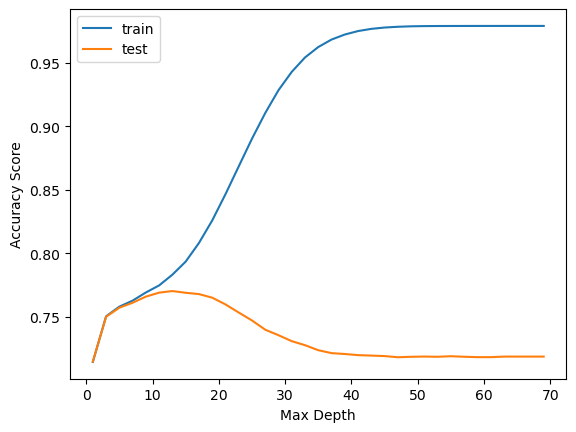

In [51]:
# Plot `depth_hyperparams`, `training_acc`.
plt.plot(depth_hyperparams, train_acc, label="train")
plt.plot(depth_hyperparams, test_acc, label="test")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend();

In [52]:
# Create a dataframe of training_acc and test_acc.
df_acc = pd.DataFrame({'train_acc': train_acc, 'test_acc': test_acc})
df_acc.head(7)

,train_acc,test_acc
0,0.714646,0.714872
1,0.750518,0.750162
2,0.758127,0.757307
3,0.762867,0.761211
4,0.769287,0.766020
5,0.774837,0.769163
6,0.783303,0.770409


In [53]:
# Create series.
df_acc.index[df_acc.train_acc - df_acc.test_acc < abs(0.01)]

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [54]:
# Copy the X_use and y_use data.
X = X_use.copy()
y = y_use.copy()

# Based on the visualization, choose the max_depth value of 5.
model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(max_depth=5, random_state=42))

# Fit model to training data.
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['district_id', 'land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'has_superstructure_adobe_mud',
                                      'has_superstructure_mud_mortar_stone',
                                      'has_superstructure_stone_flag',
                                      'has_superstructure_cement_mortar_stone',
                                      'has_superstr...
                                         {'col': 'has_superstructure_rc_engineered',
                                          'data_type': CategoricalDtype(categories=[0, 1], ordered=False),
                                          'mapping': 0.0    1
1.0    2
NaN   -2
dtype: int64},
                                         {'col': 'has_superstructure_other',
                                          'data_type': CategoricalDtype(categories=[0, 1], ordered=False),
                                          'mapping': 0.0    1
1.0    2
NaN   -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [55]:
# Calculate training and validation accuracy scores.
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Train Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Train Accuracy: 0.7581
Test Accuracy: 0.7573


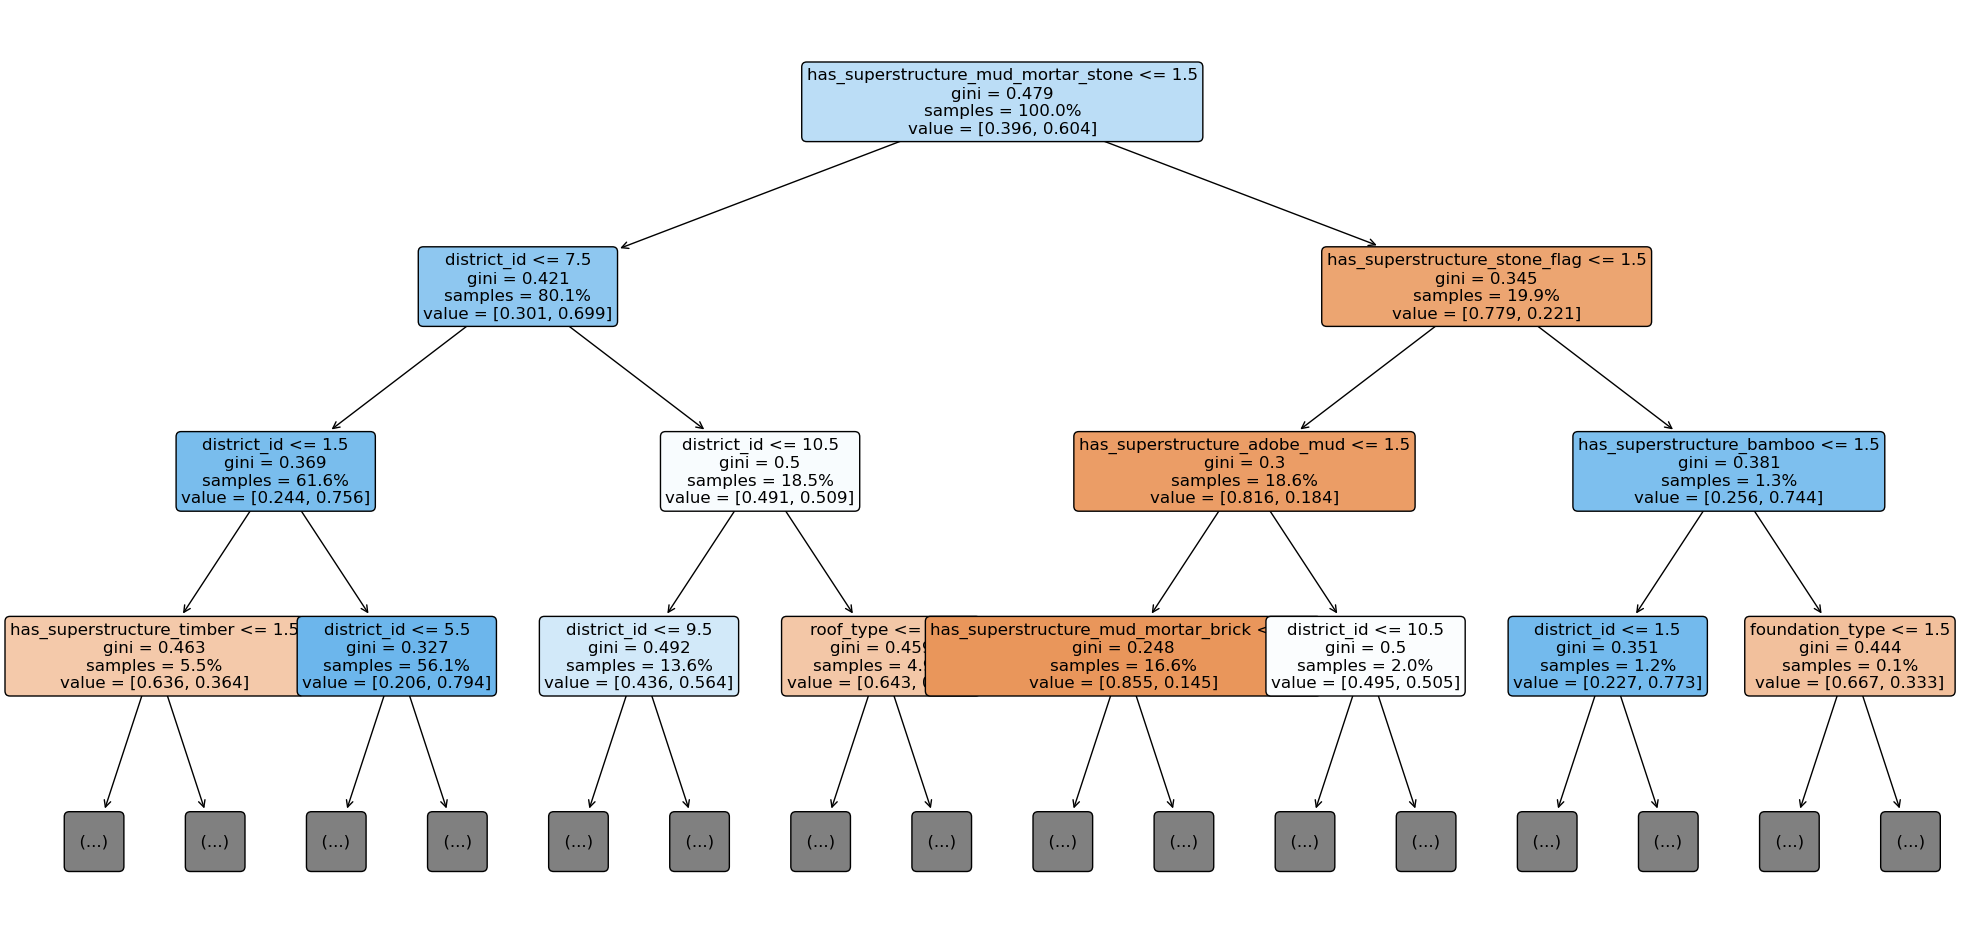

In [56]:
# Create plot_tree function from scikit-learn to visualize the decision logic of the model.
fig, ax = plt.subplots(figsize=(25, 12))

# Plot tree.
plot_tree(
            decision_tree=model.named_steps["decisiontreeclassifier"],
            feature_names=X_train.columns.to_list(),
            filled=True,  # Color leaf with class
            rounded=True,  # Round leaf edges
            proportion=True,  # Display proportion of classes in leaf
            max_depth=3,  # Only display first 3 levels
            fontsize=12,  # Enlarge font
            ax=ax,  # Place in figure axis
        );

In [57]:
# Assign the feature names and importances of your model to the variables.
features = X_train.columns
importances = model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['district_id', 'age_building', 'plinth_area_sq_ft'], dtype='object')
Importances: [0.38498583 0.00986447 0.00147791]


In [58]:
# Create a pandas Series named feat_imp.
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.tail(10)

has_superstructure_bamboo              0.002112
has_superstructure_timber              0.003976
roof_type                              0.004722
ground_floor_type                      0.008609
age_building                           0.009864
has_superstructure_mud_mortar_brick    0.013978
has_superstructure_adobe_mud           0.031161
has_superstructure_stone_flag          0.051835
district_id                            0.384986
has_superstructure_mud_mortar_stone    0.483546
dtype: float64

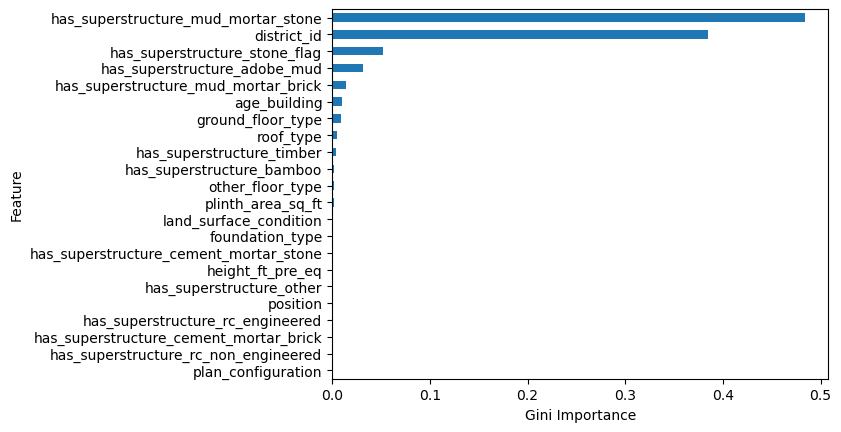

In [59]:
# Create a horizontal bar chart with all the features in feat_imp.
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");

In [60]:
# Copy the X_use and y_use data.
X = X_use.copy()
y = y_use.copy()

# Divide data (X and y) into training and test sets using a randomized train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline that contains a OrdinalEncoder transformer and a DecisionTreeClassifier predictor.
model = make_pipeline(OrdinalEncoder(), XGBClassifier())

# Fit model to training data.
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['district_id', 'land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'has_superstructure_adobe_mud',
                                      'has_superstructure_mud_mortar_stone',
                                      'has_superstructure_stone_flag',
                                      'has_superstructure_cement_mortar_stone',
                                      'has_superstr...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [61]:
# Calculate train and test accuracy scores.
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Train Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Train Accuracy: 0.7846
Test Accuracy: 0.7783


In [62]:
lr_hyperparams = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

In [63]:
# Code that trains a model for every learning_rate in lr_hyperparams.
# Copy the X_use and y_use data.
X = X_use.copy()
y = y_use.copy()

# Divide training data into training and validation sets using randomized train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create empty lists for training and validation accuracy scores.
train_acc = []
test_acc = []

for l in lr_hyperparams:
    # Create model with `learning_rate` of `l`.
    test_model = make_pipeline(OrdinalEncoder(), 
                               XGBClassifier(learning_rate=l, random_state=42))
    
    # Fit model to training data.
    test_model.fit(X_train, y_train)
    
    # Calculate training accuracy score and append to `training_acc`.
    train_acc.append(test_model.score(X_train, y_train))
    
    # Calculate testing accuracy score and append to `training_acc`.
    test_acc.append(test_model.score(X_test, y_test))

print("Train Accuracy Scores:", train_acc[:3])
print("Test Accuracy Scores:", test_acc[:3])

Train Accuracy Scores: [0.7746274654529053, 0.7807241563127896, 0.7846016320170582]
Test Accuracy Scores: [0.7713014781621714, 0.7755791600784679, 0.7783019177399143]


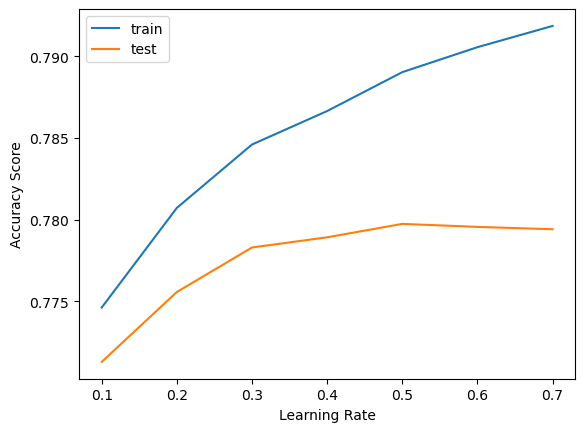

In [64]:
# Plot `lr_hyperparams`, `train_acc`.
plt.plot(lr_hyperparams, train_acc, label="train")
plt.plot(lr_hyperparams, test_acc, label="test")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy Score")
plt.legend();

In [65]:
# Create a dataframe of train_acc and test_acc.
df_acc = pd.DataFrame({'train_acc': train_acc, 'test_acc': test_acc})
df_acc.tail(7)

,train_acc,test_acc
0,0.774627,0.771301
1,0.780724,0.775579
2,0.784602,0.778302
3,0.786649,0.778925
4,0.789029,0.779745
5,0.790556,0.779562
6,0.791856,0.779417


In [66]:
# Copy the X_use and y_use data.
X = X_use.copy()
y = y_use.copy()

# Based on the visualization, choose the learning_rate value of 0.5.
model = make_pipeline(OrdinalEncoder(), XGBClassifier(learning_rate=0.5, random_state=42))

# Fit model to training data.
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['district_id', 'land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'has_superstructure_adobe_mud',
                                      'has_superstructure_mud_mortar_stone',
                                      'has_superstructure_stone_flag',
                                      'has_superstructure_cement_mortar_stone',
                                      'has_superstr...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [67]:
# Calculate training and validation accuracy scores.
acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = model.score(X_test, y_test)

print("Train Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Train Accuracy: 0.789
Test Accuracy: 0.7797


In [68]:
# Assign the feature names and importances of your model to the variables.
features = X_train.columns
importances = model.named_steps["xgbclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['district_id', 'age_building', 'plinth_area_sq_ft'], dtype='object')
Importances: [0.08441239 0.00938615 0.00548546]


In [69]:
# Create a pandas Series named feat_imp.
feat_imp = pd.Series(importances, index=features).sort_values()
feat_imp.tail(10)

ground_floor_type                         0.015810
has_superstructure_cement_mortar_stone    0.016814
roof_type                                 0.023825
has_superstructure_mud_mortar_brick       0.031657
has_superstructure_cement_mortar_brick    0.037474
has_superstructure_adobe_mud              0.041653
foundation_type                           0.043887
has_superstructure_stone_flag             0.062925
district_id                               0.084412
has_superstructure_mud_mortar_stone       0.532548
dtype: float32

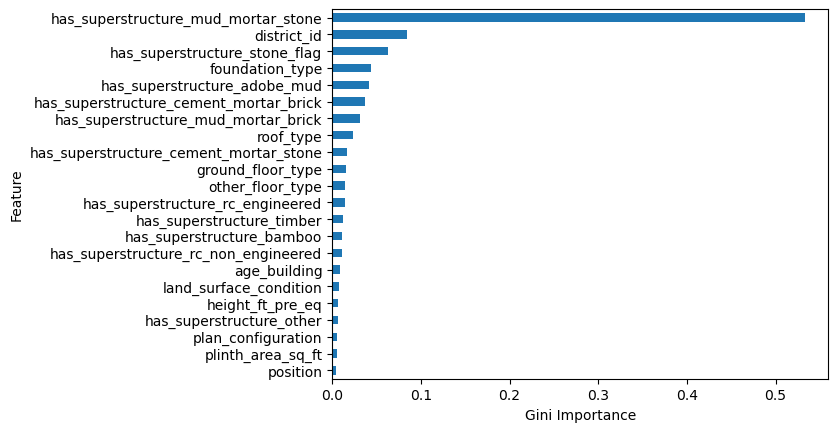

In [70]:
# Create a horizontal bar chart with all the features in feat_imp.
feat_imp.plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");